In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ___Estimating Population Means with Confidence___
------------------

In [7]:
!dir ..\data

 Volume in drive D has no label.
 Volume Serial Number is 3A29-3F7E

 Directory of D:\Inferential-Statistical-Analysis-with-Python\data

08/06/2023  07:47 pm    <DIR>          .
01/06/2023  05:37 am    <DIR>          ..
20/05/2023  04:03 pm               866 Cartwheeldata.csv
07/06/2023  04:33 pm            17,906 CommonCLZvalues.png
01/06/2023  06:34 am         2,581,551 EV_Population_Data.csv
20/05/2023  04:03 pm             2,831 nap_no_nap.csv
20/05/2023  04:03 pm           762,373 nhanes_2015_2016.csv
06/06/2023  04:56 pm         7,224,973 USDA_plants_database.csv
               6 File(s)     10,590,500 bytes
               2 Dir(s)  148,181,811,200 bytes free


In [23]:
metro = pd.read_csv("../data/MetroPT3(AirCompressor).csv")        # .drop("Unnamed: 0", axis = 1)
# metro.to_csv("../data/MetroPT3(AirCompressor).csv", index = False)

In [24]:
metro.shape

(1516948, 8)

In [52]:
# Mean oil temperature (population)

pop_mean = metro.Oil_temperature.mean()
pop_mean

62.64418173859618

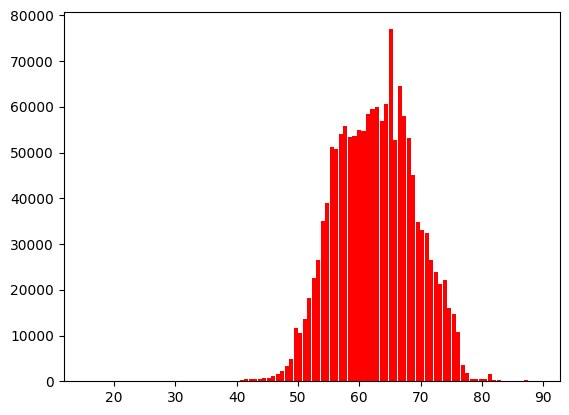

In [35]:
fig, axes = plt.subplots()
axes.hist(metro.Oil_temperature, bins = 100, rwidth = 0.9, color = "red")
plt.show()

In [40]:
metro.Oil_temperature.min(), metro.Oil_temperature.median(), metro.Oil_temperature.max()

(15.400000000000006, 62.7, 89.05000000000001)

In [44]:
quantiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1]
quant_vals = np.quantile(metro.Oil_temperature, q = quantiles)
bins = [(metro.Oil_temperature <= qval).sum() for qval in quant_vals]

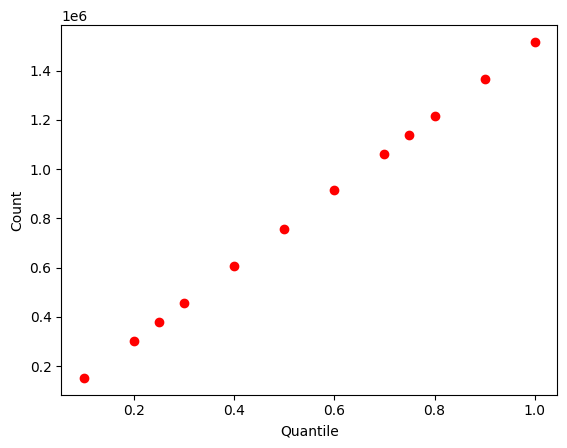

In [48]:
fig, axes = plt.subplots()
axes.scatter(quantiles, bins, color = "red")
axes.set_xlabel("Quantile")
axes.set_ylabel("Count")
plt.show()

In [49]:
metro.Oil_temperature.describe()

count    1.516948e+06
mean     6.264418e+01
std      6.516261e+00
min      1.540000e+01
25%      5.777500e+01
50%      6.270000e+01
75%      6.725000e+01
max      8.905000e+01
Name: Oil_temperature, dtype: float64

In [54]:
# Lets make a sample of size 10,000

sample = metro.Oil_temperature[np.random.randint(0, metro.Oil_temperature.size, size = 1000)]
sample.mean()

62.3962

In [55]:
pop_mean

62.64418173859618

In [60]:
print(f"Sample size as a fraction of population size: {1000 / metro.Oil_temperature.size}")

Sample size as a fraction of population size: 0.000659218377953628


In [67]:
# Distribution of the sample means. => 10,000 samples of size 1,000

smeans = []
for _ in range(10000):
    smeans.append(metro.Oil_temperature[np.random.randint(0, metro.Oil_temperature.size, size = 1000)].mean())

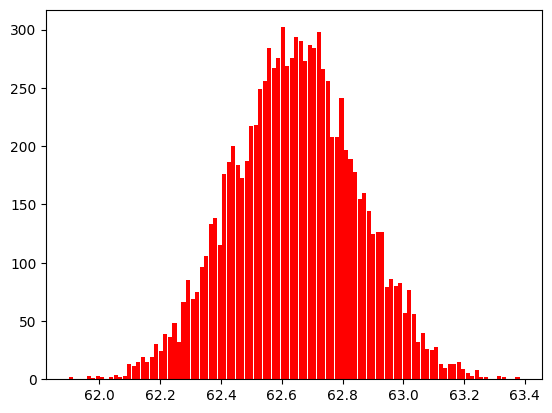

In [68]:
fig, axes = plt.subplots()
axes.hist(smeans, bins = 100, rwidth = 0.9, color = "red")
plt.show()

In [69]:
# Even if the population is skewed (either right or left skewed, the distrbution of the sample metric (mean) needs to be normal)
# To ensure this, we must make sure that our samples are large enough.

In [78]:
# Expect a right skewed distribution

skewed_pop = np.random.randint(0, 100, size = 100)
skewed_pop = np.append(skewed_pop, np.random.randint(0, 20, size = 100))

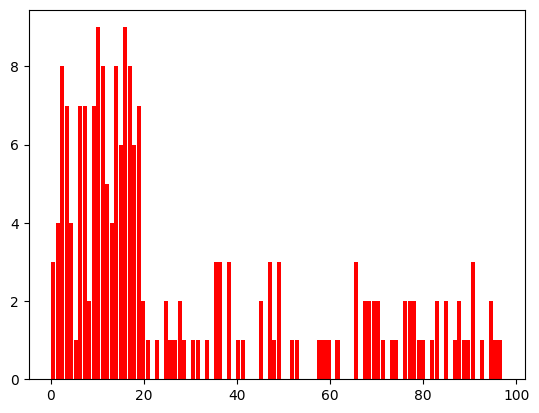

In [79]:
fig, axes = plt.subplots()
axes.hist(skewed_pop, bins = 100, rwidth = 0.9, color = "red")
plt.show()

In [87]:
skew_means = []

for _ in range(1000):
    skew_means.append(np.random.choice(skewed_pop, size = 20).mean())

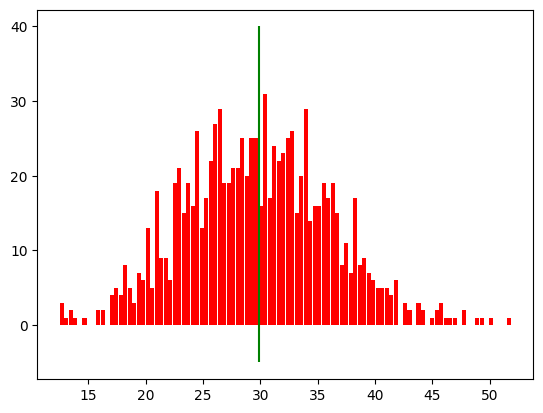

In [93]:
# We still get a bell shaped curve.

fig, axes = plt.subplots()
axes.hist(skew_means, bins = 100, rwidth = 0.9, color = "red")
axes.vlines(x = skewed_pop.mean(), ymin = -5, ymax = 40, color = "green")
plt.show()